# PatchSim

In [1]:
import pandas as pd
import patchsim as sim
import numpy as np
import matplotlib.pyplot as plt

### cfg.txt - Configuraciones

In [2]:
f = open("files/cfg.txt", "w")
f.write("""PatchFile=files/pop.txt
NetworkFile=files/net.txt
NetworkType=Static

ExposureRate=0.65
InfectionRate=0.67
RecoveryRate=0.4
WaningRate=0.03

SymptomaticProbability=0.2
AsymptomaticReduction=0.5
PresymptomaticReduction=0.5

ScalingFactor=1

SeedFile=files/seeds.txt
VaxFile=files/vaxs.txt
VaxDelay=4
VaxEfficacy=0.5

StartDate=1
Duration=100

LoadState=False
SaveState=False
SaveFile=states_matrix

OutputFile=resultados.out
OutputFormat=Whole
LogFile=procesos.log""")
f.close()

### pop.txt - path_df - Tamaño de poblaciones

In [3]:
df = pd.DataFrame( {"id":["A", "B", "C"], 
                    "poblacion":[10000, 10000, 10000]})

df.to_csv("files/pop.txt", header = False, index = False, sep=' ')
df

,id,poblacion
0,A,10000
1,B,10000
2,C,10000


### net.txt - Theta - Matriz de viajes

In [4]:
df = pd.DataFrame( {"origen":["A","B","C"], 
                    "destino":["A","B","C"], 
                    "dia":[0,0,0],
                    "hbw":[1,1,1]})

df.to_csv("files/net.txt", header = False, index = False, sep=' ')

df

,origen,destino,dia,hbw
0,A,A,0,1
1,B,B,0,1
2,C,C,0,1


### seeds.txt - Seed - Primeros infectados

In [5]:
df = pd.DataFrame( {"dias":[0,0,1,2],
                    "id":["A","B","C","C"],
                    "infectados":[20,20,20,30]})

df.to_csv("files/seeds.txt", header = False, index = False, sep=' ')
df

,dias,id,infectados
0,0,A,20
1,0,B,20
2,1,C,20
3,2,C,30


### vaxs.txt - Vacunas - Primeros vacunados

In [6]:
df = pd.DataFrame( {"dias":[0,2,5],
                    "id":["A","B","C"],
                    "vacunados":[10,10,10]})

df.to_csv("files/vaxs.txt", header = False, index = False, sep=' ')
df

,dias,id,vacunados
0,0,A,10
1,2,B,10
2,5,C,10


### Llamando función PatchSim

In [7]:
configs = sim.read_config('files/cfg.txt')
sim.run_disease_simulation(configs, write_epi=True)

27731

In [8]:
infec = pd.read_csv("resultados.out", sep=' ', header=None)
infec.index = infec[0].T.values
infec = infec.drop(0, axis=1)
infec

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
A,8,7,8,9,10,12,13,15,17,19,...,53,54,54,55,56,57,58,59,60,61
B,8,7,8,9,10,12,13,15,17,19,...,53,54,54,55,56,57,58,59,60,61
C,0,8,19,19,21,24,27,30,34,38,...,57,58,59,60,61,63,64,65,67,68


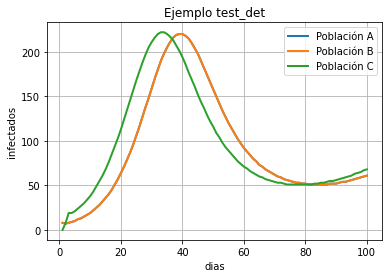

In [9]:
fig, ax = plt.subplots()
ax.set_title("Ejemplo test_det")
for i in infec.index:
    ax.plot(infec.T[i], label="Población "+str(i), lw=2)
plt.legend()
plt.xlabel("dias")
plt.ylabel("infectados")
plt.grid()

In [10]:
x = np.load("states_matrix.npy")
pd.DataFrame(x, index=["S","E","I","R","V","new_inf"]).T

,S,E,I,R,V,new_inf
0,7240.932285,89.874390,144.350993,2519.842331,5.0,0.0
1,7240.979342,89.879259,144.357973,2519.783426,5.0,0.0
2,7299.503030,100.353576,159.954101,2435.189293,5.0,0.0
